<a href="https://colab.research.google.com/github/Esteban191/proyecto/blob/master/AudioSpectrograms_psd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import sys
from google.colab import drive, output
drive.mount('/content/drive')
%load_ext autoreload
%autoreload 1
sys.path.append('/content/drive/MyDrive/Jaguas_2018')
%cd '/content/drive/MyDrive/Jaguas_2018'
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/content/drive/.shortcut-targets-by-id/1nfTdDkppiuyI6pOFb93wUYtK8j6DA0cv/Jaguas_2018


##Librerias

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import librosa
import os
from pathlib import Path
import librosa.display
from librosa.display import specshow
import pickle
from IPython.display import Audio #reproducir audio

#Obtener PSD(Power Spectral Density)solo par aun  audio

##cargar ruta y audios

In [4]:
root_path = '/content/drive/MyDrive/Jaguas_2018'
folders = os.listdir(root_path)
files = []
for i in range(len(folders)):
    path_aux = "{}/{}".format(root_path, folders[i])
    files += list(Path(path_aux).rglob("*.{}".format("wav")))

filename = str(files[12000])

print(filename)


/content/drive/MyDrive/Jaguas_2018/G28_m/G28_20180610_164800.wav


##Obtener PSD(Power Spectral Density) densidad espectral de potencia

In [ ]:
n_fft = 1024
y, sr = librosa.load(filename, sr=44100)
S = librosa.stft(y, n_fft=n_fft)
psd=np.abs(S)**2
P = np.mean(psd, axis=1)

plt.psd(y)

<ipython-input-8-deba0d085397>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),


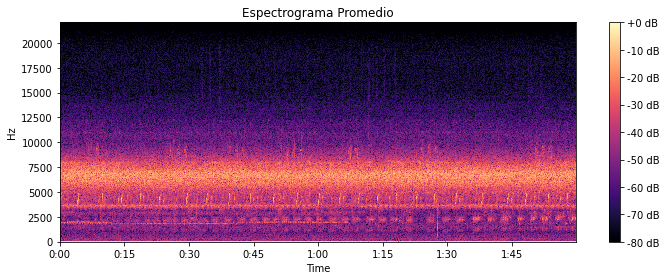

In [8]:
# Graficar el espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='linear', x_axis='time', sr=sr, hop_length=512)
plt.title('Espectrograma Promedio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PSD/espectrograma_G50_m.pdf", format="pdf")
plt.show()

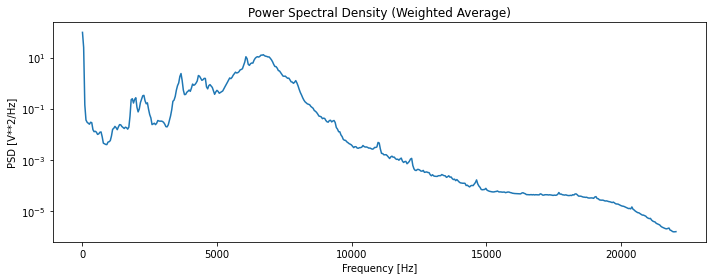

In [6]:

f = librosa.fft_frequencies(sr=44100, n_fft=1024)
plt.figure(figsize=(10,4))
plt.semilogy(f, np.mean(psd, axis=1))#foma logariotmica
plt.title('Power Spectral Density (Weighted Average)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/PSD/psd_G50_m.pdf", format="pdf")
plt.show()

In [ ]:
S.shape

(513, 10336)

#funciones

In [17]:
def calcular_promedio_psd_en_carpetas(path_to_folder='/content/drive/MyDrive/Jaguas_2018',                                    
                                      cantidad_audios=None,
                                      mostrar_espectrograma=True,
                                      resample_rate=44100, 
                                      nuevo_resample_rate=None,
                                      guardar_espectrograma=True, shape=(513, 10336)):
    carpetas = [os.path.join(path_to_folder, nombre_carpeta) 
    for nombre_carpeta in os.listdir(path_to_folder) 
        if os.path.isdir(os.path.join(path_to_folder, nombre_carpeta))]

    # Contador de carpetas procesadas
    contador_carpetas = 0

    for carpeta in carpetas:
        audio_paths = [os.path.join(carpeta, filename) for filename in os.listdir(carpeta) if filename.endswith('.wav')]

        if cantidad_audios is not None:
            audio_paths = audio_paths[:cantidad_audios]

        sumatoria_spectrograms = np.zeros(shape)

        for i in range(0, len(audio_paths)):
            audio, sr = librosa.load(audio_paths[i], sr=resample_rate)
            if nuevo_resample_rate is not None:
                audio = librosa.resample(audio, orig_sr=resample_rate, target_sr=nuevo_resample_rate)
                sr = nuevo_resample_rate

            spectrogram = librosa.stft(audio, n_fft=1024)
            psd = np.abs(spectrogram)**2
            sumatoria_spectrograms += psd

        f = librosa.fft_frequencies(sr=sr, n_fft=1024)
        promedio = sumatoria_spectrograms/len(audio_paths)

        if mostrar_espectrograma:
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(librosa.amplitude_to_db(promedio, ref=np.max),
                                     y_axis='linear', x_axis='time', sr=sr, hop_length=512)#moidfica rango en x timpo en el espectrog
            plt.title('Espectrograma Promedio')
            plt.colorbar(format='%+2.0f dB')
            plt.tight_layout()
            if guardar_espectrograma:
                nombre_carpeta_nueva = f"/content/drive/MyDrive/PSD/{os.path.basename(carpeta)}"
                os.makedirs(nombre_carpeta_nueva, exist_ok=True)
                nombre_espectrograma = f"{nombre_carpeta_nueva}/{os.path.basename(carpeta)}_espectrograma_sr{nuevo_resample_rate}.pdf"
                plt.savefig(nombre_espectrograma, format="pdf")
            plt.show()

        plt.figure(figsize=(10,4))
        plt.semilogy(f, np.mean(promedio, axis=1))
        plt.title(f'Promedio PSD de {carpeta}')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [V**2/Hz]')
        plt.tight_layout()
        #GUARDAR
        nombre_carpeta_nueva = f"/content/drive/MyDrive/PSD/{os.path.basename(carpeta)}"
        os.makedirs(nombre_carpeta_nueva, exist_ok=True)
        nombre_pdf = f"{nombre_carpeta_nueva}/{os.path.basename(carpeta)}_PSD_sr{nuevo_resample_rate}.pdf"
        plt.savefig(nombre_pdf, format="pdf")
        plt.show()

        nombre_pickle =  f"{nombre_carpeta_nueva}/{os.path.basename(carpeta)}_PSD_sr{nuevo_resample_rate}.pickle"
        # Guardar los resultados en formato pickle
        with open(nombre_pickle, "wb") as f:
            pickle.dump(promedio, f)
        print(f"{cantidad_audios} archivos procesados en la carpeta {carpeta}")
       


###Llamar funcion para 22050hz

In [ ]:
calcular_promedio_psd_en_carpetas(cantidad_audios=5, mostrar_espectrograma=True,
                          resample_rate=44100, nuevo_resample_rate=22050,
                          guardar_espectrograma=True, shape=(513,5168))

## Llamar funcion para tasa de meustreo de 44100

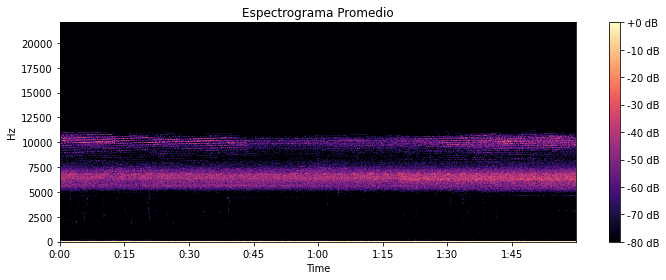

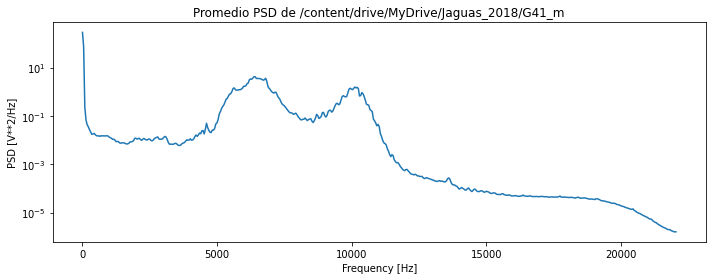

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G41_m


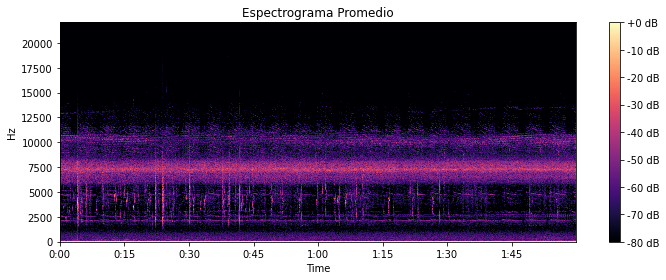

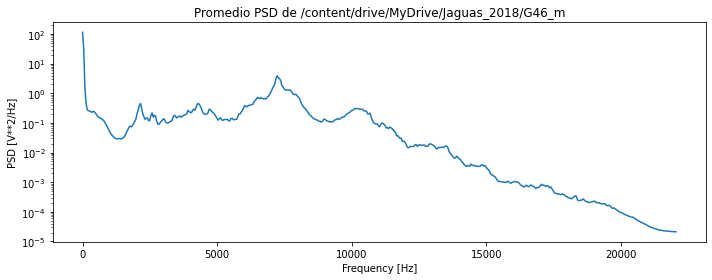

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G46_m


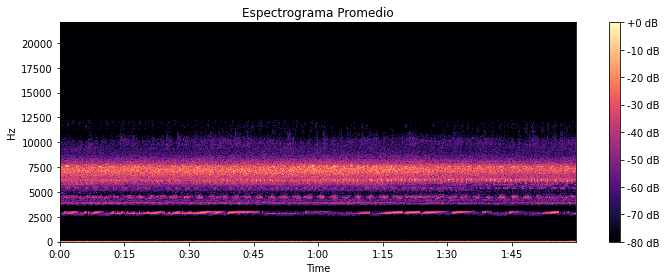

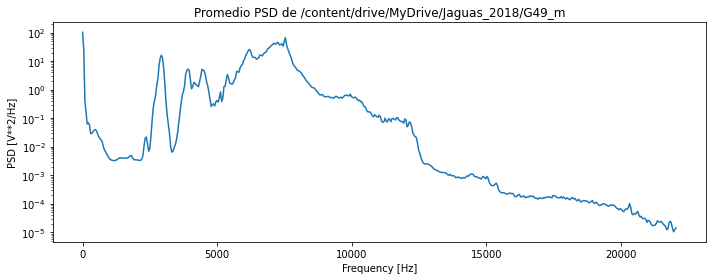

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G49_m


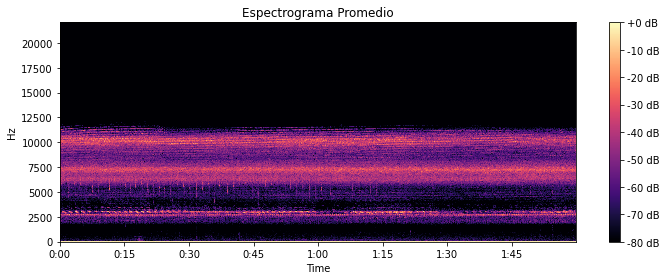

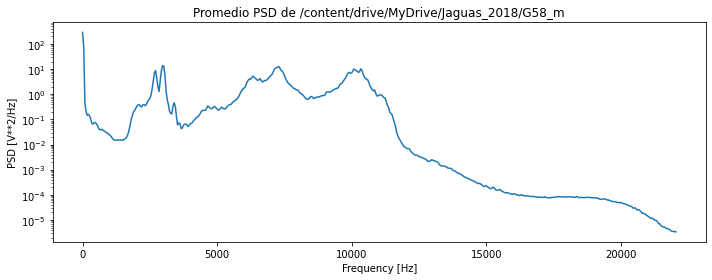

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G58_m


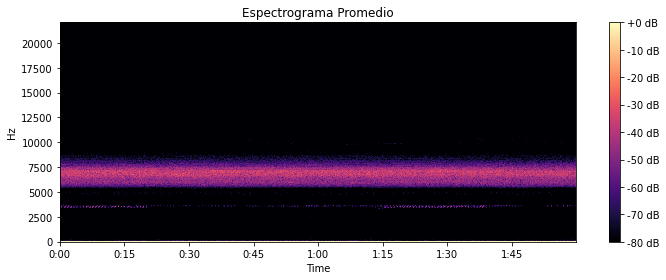

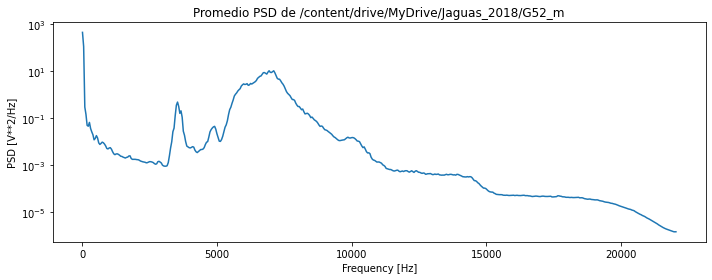

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G52_m


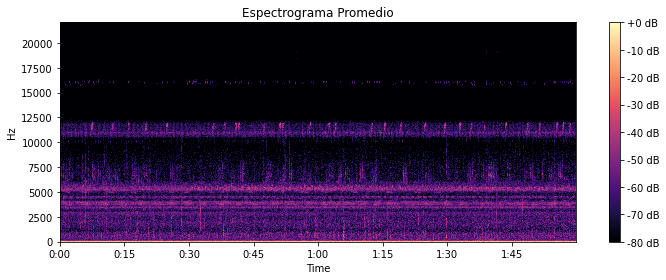

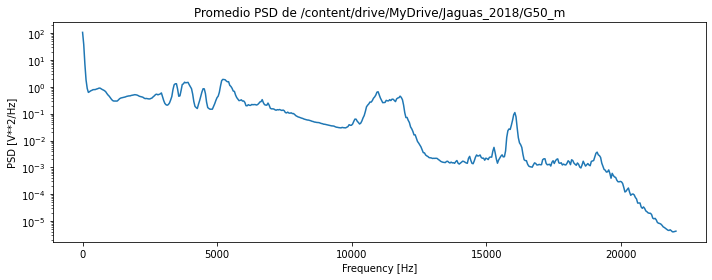

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G50_m


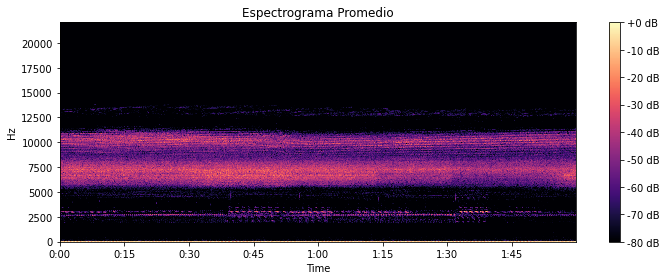

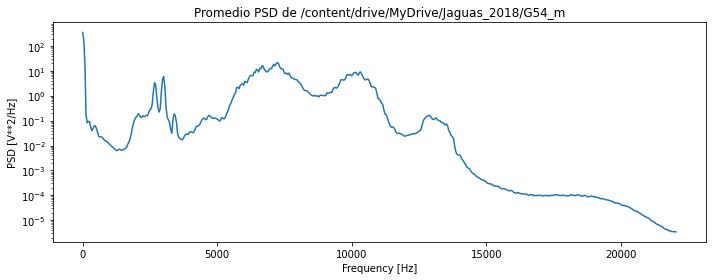

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G54_m


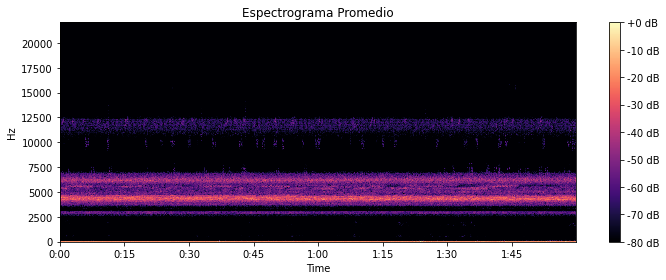

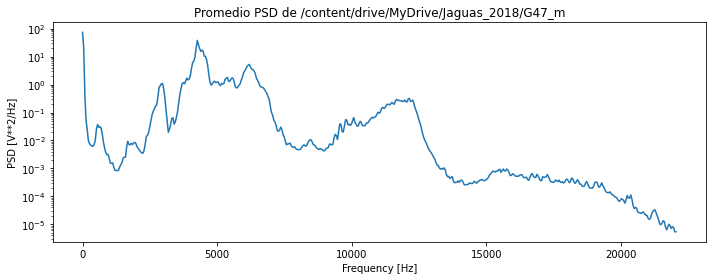

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G47_m


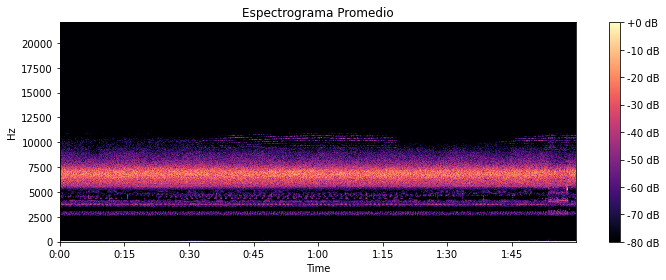

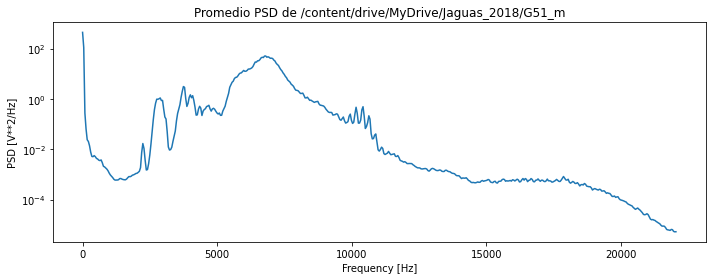

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G51_m


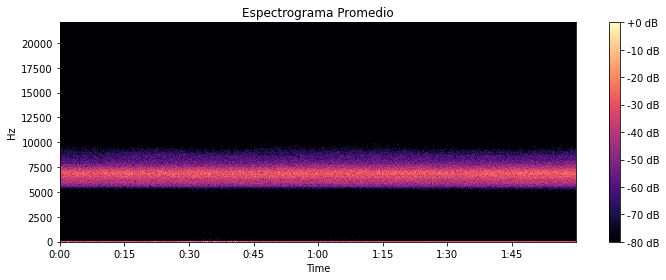

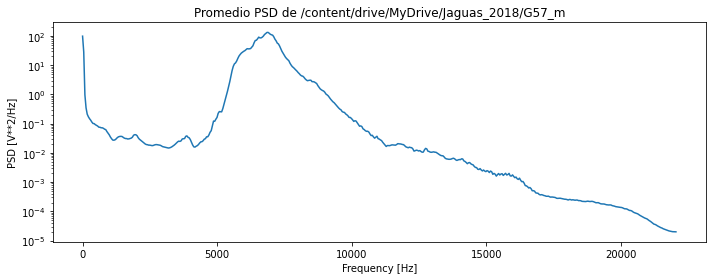

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G57_m


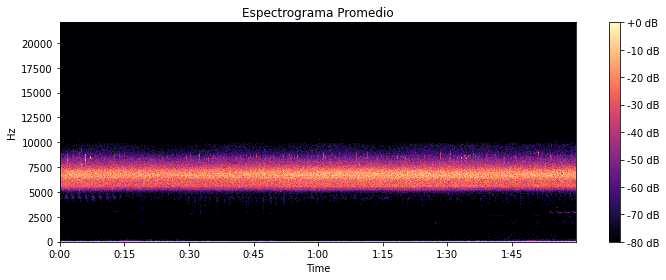

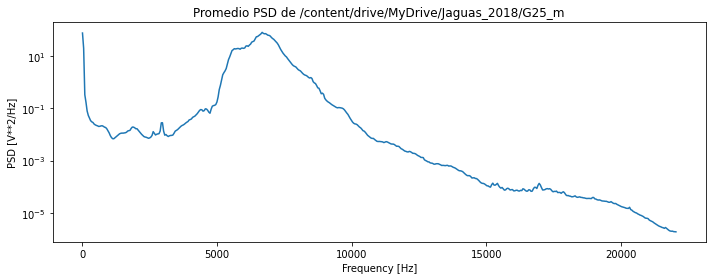

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G25_m


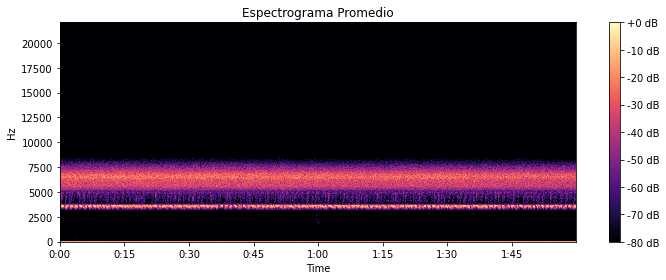

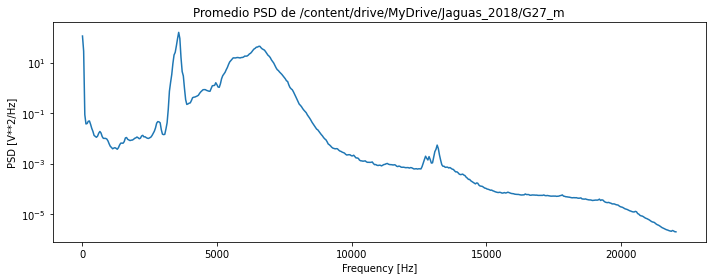

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G27_m


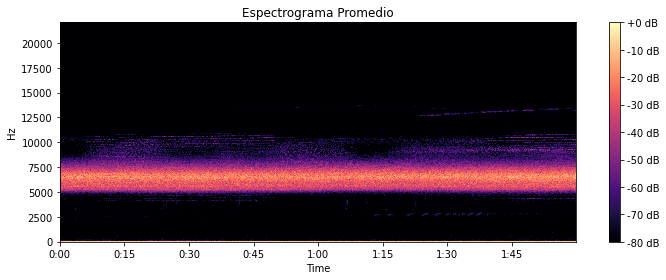

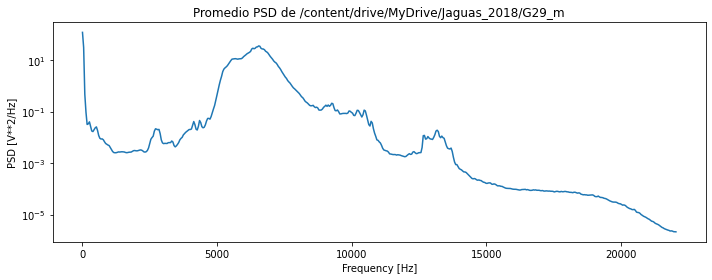

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G29_m


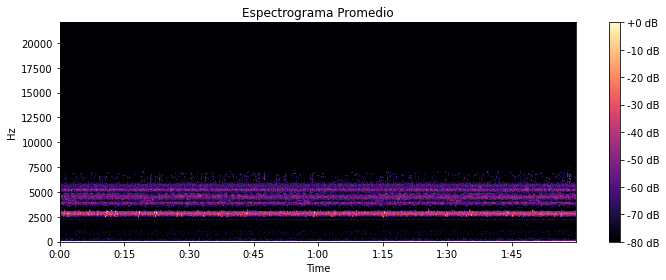

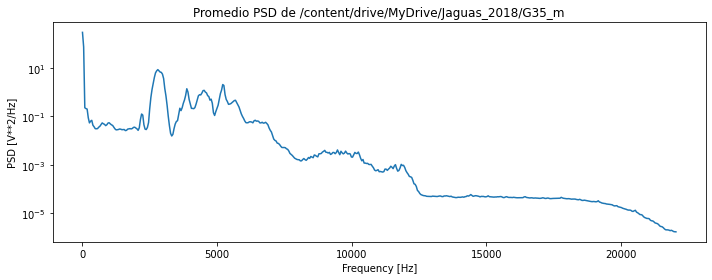

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G35_m


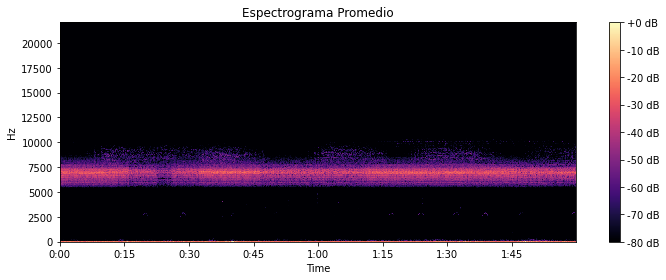

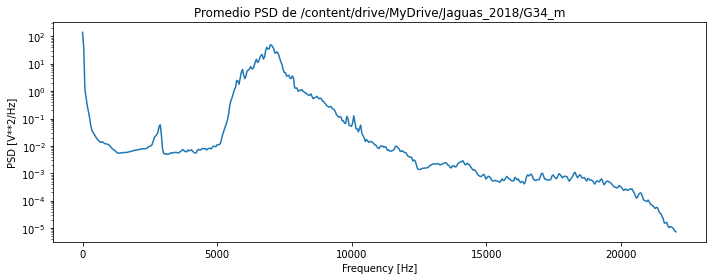

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G34_m


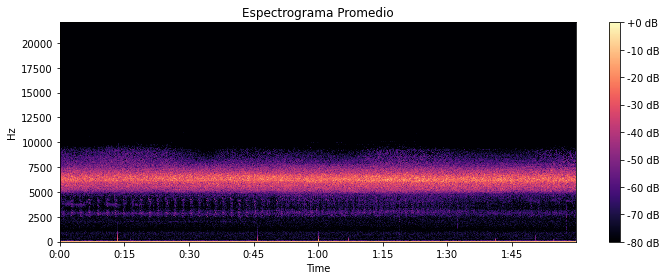

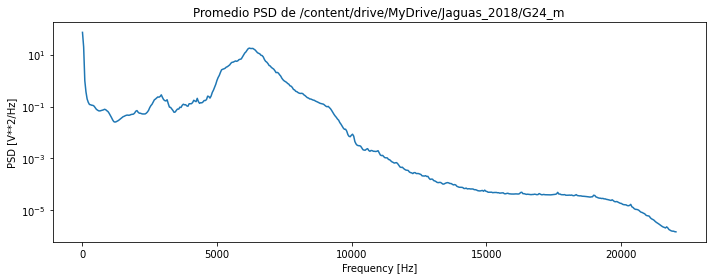

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G24_m


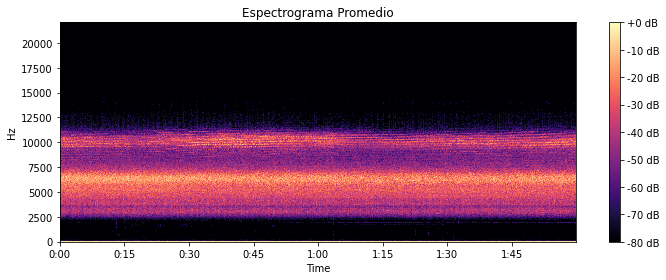

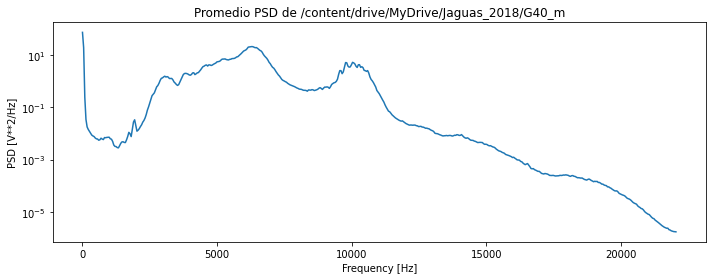

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G40_m


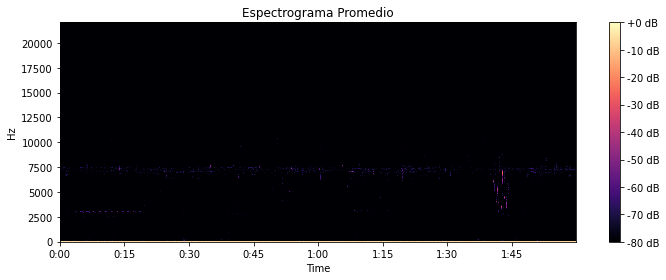

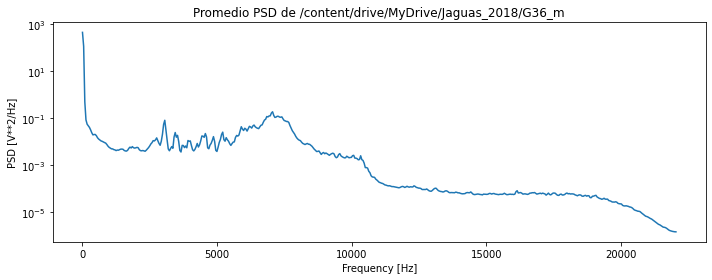

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G36_m


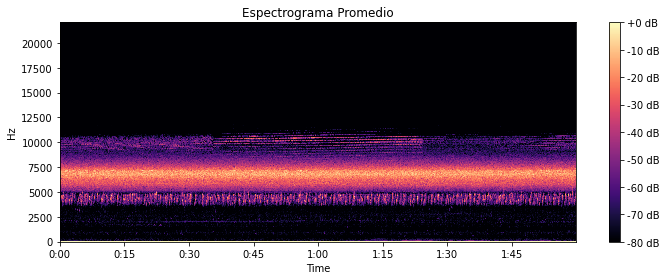

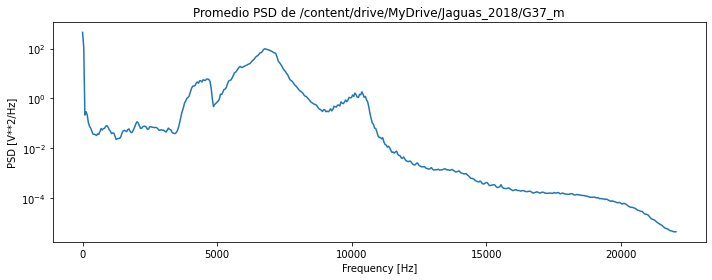

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G37_m


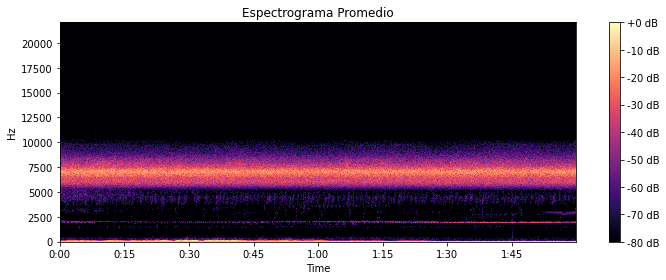

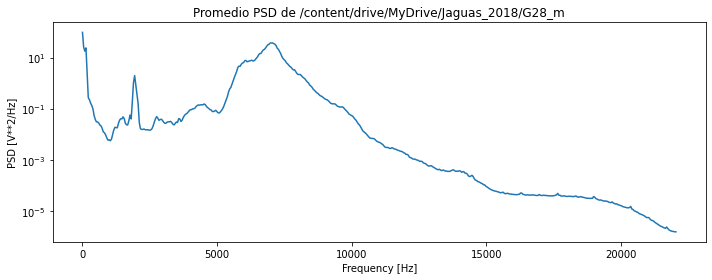

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G28_m


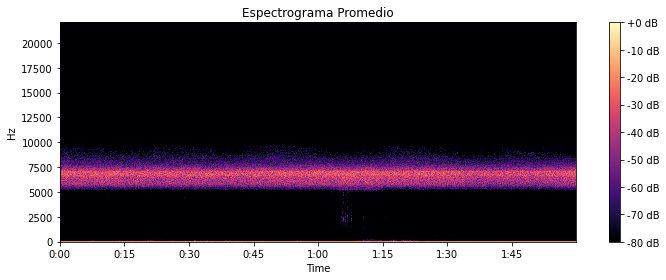

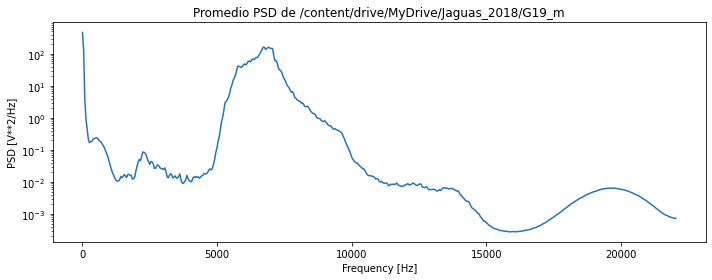

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G19_m


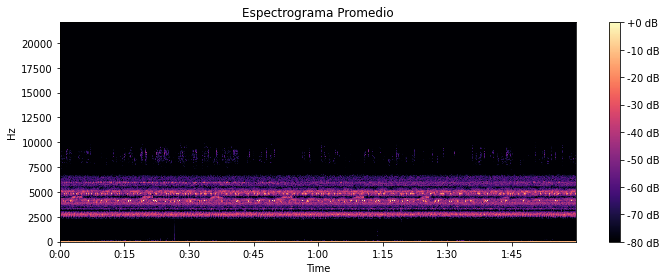

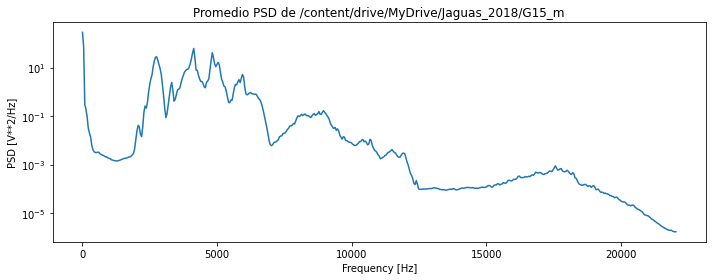

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G15_m


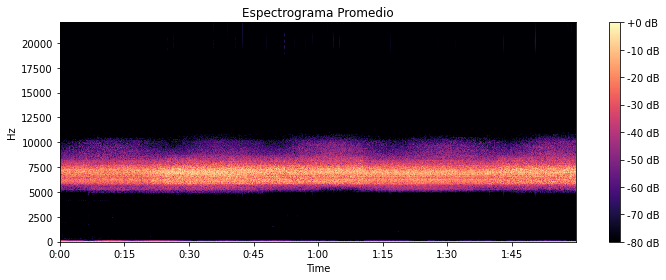

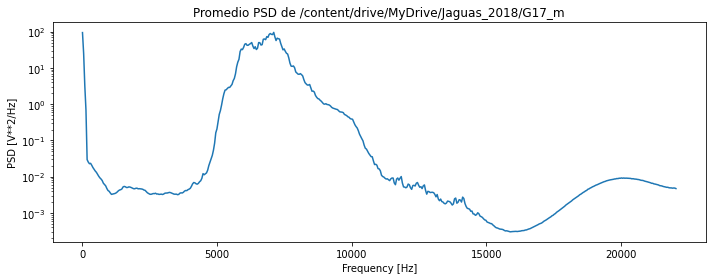

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G17_m


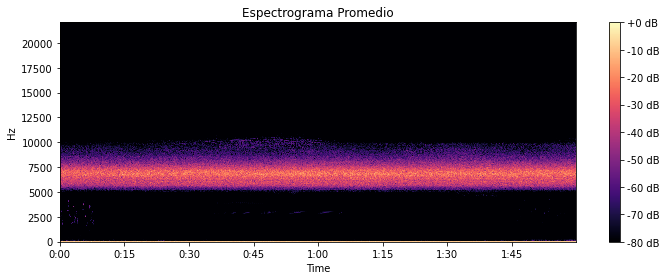

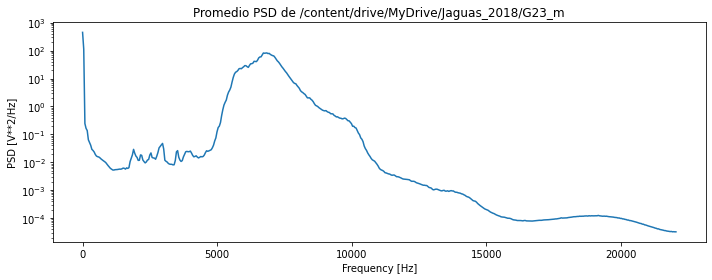

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G23_m


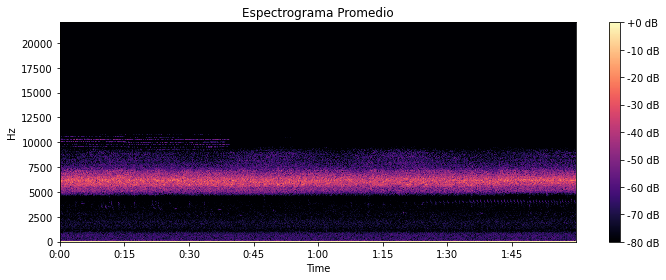

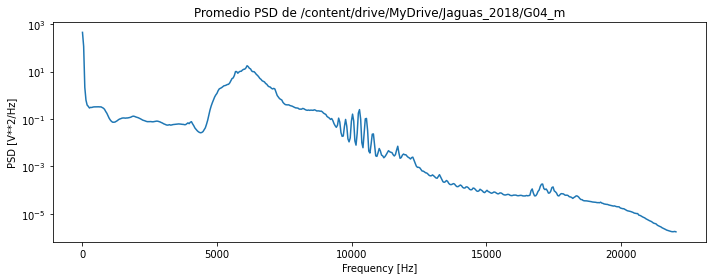

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G04_m


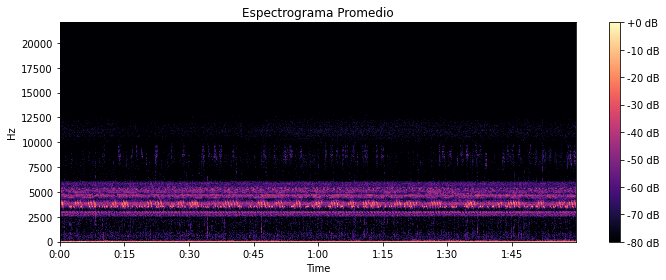

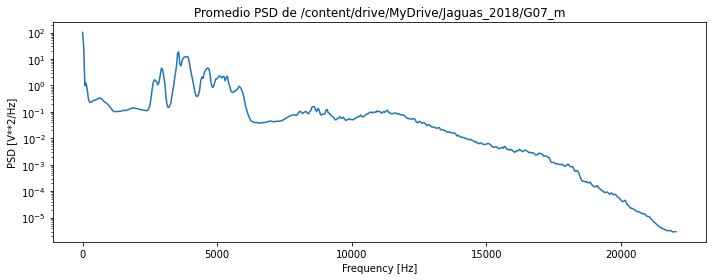

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G07_m


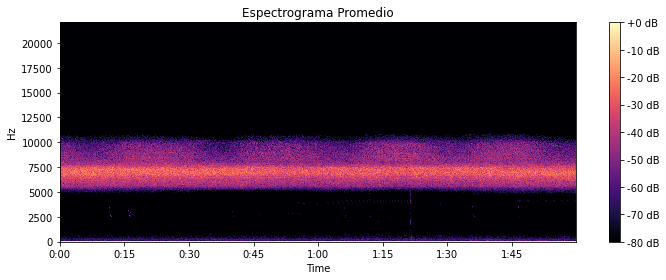

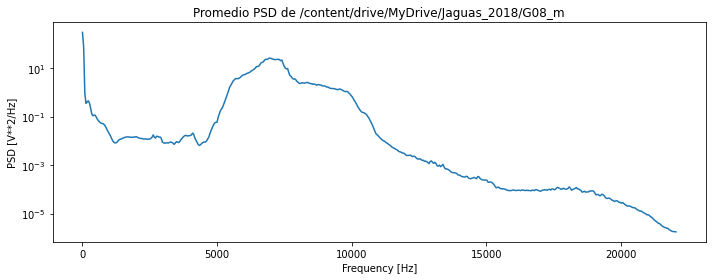

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G08_m


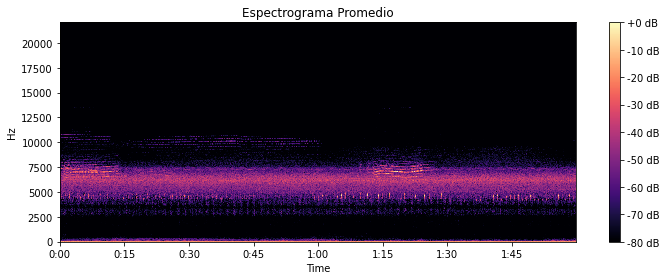

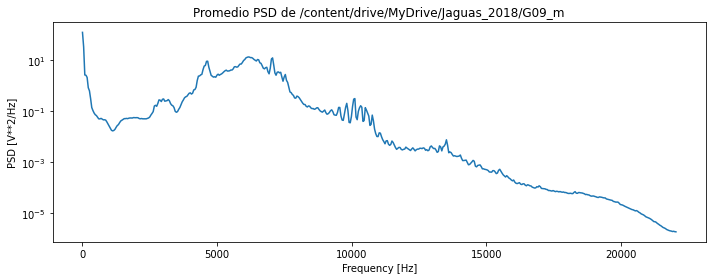

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G09_m


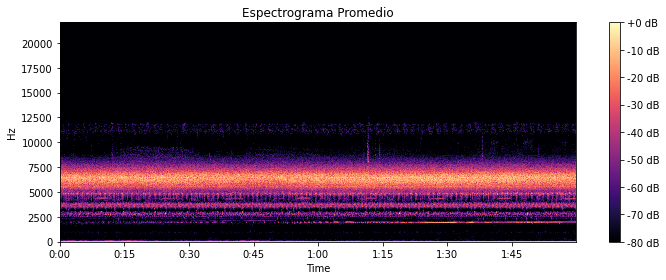

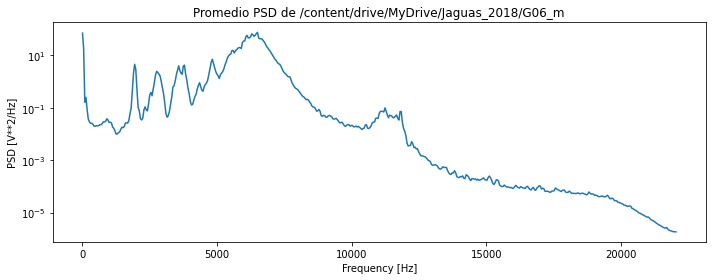

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G06_m


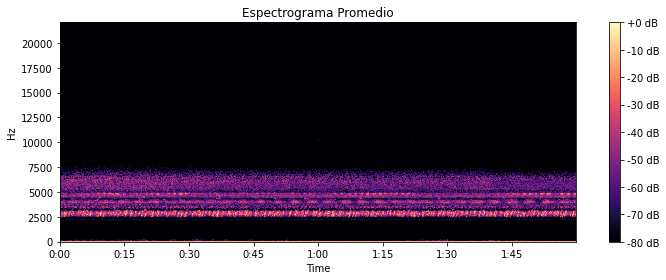

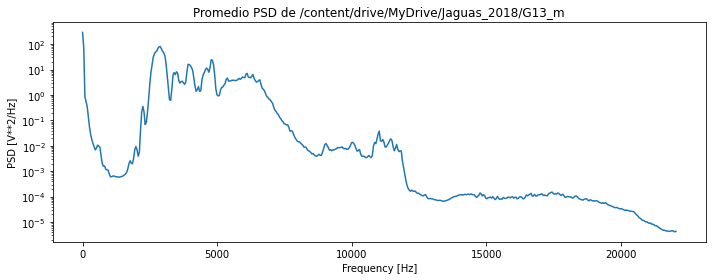

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G13_m


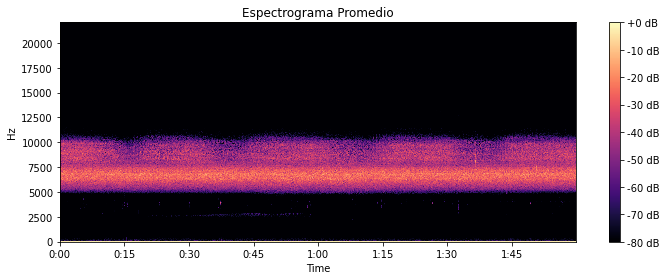

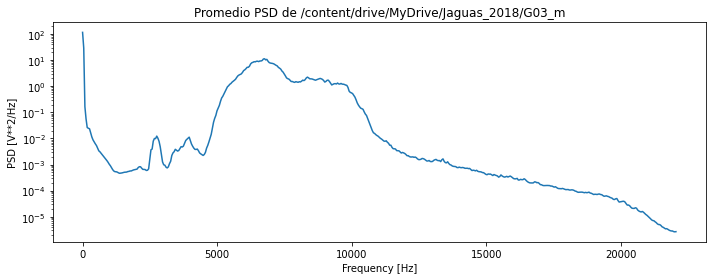

5 archivos procesados en la carpeta /content/drive/MyDrive/Jaguas_2018/G03_m


In [18]:
calcular_promedio_psd_en_carpetas(n_fft=1024, cantidad_audios=5, mostrar_espectrograma=True,
                          resample_rate=44100, nuevo_resample_rate=44100,
                          guardar_espectrograma=True, shape=(513, 10336))


##Grabadoras

In [ ]:
import os
import shutil

path_to_audio_folders = '/content/drive/MyDrive/Jaguas_2018/'

for foldername in os.listdir(path_to_audio_folders):
    if os.path.isdir(os.path.join(path_to_audio_folders, foldername)):
        folder_audio_count = 0
        folder_path = os.path.join(path_to_audio_folders, foldername)
        
        print('Carpeta:', foldername)
        
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'):
                folder_audio_count += 1
        
        print('Cantidad de archivos de audio:', folder_audio_count)


Carpeta: G41_m
Cantidad de archivos de audio: 553
Carpeta: G46_m
Cantidad de archivos de audio: 735
Carpeta: G49_m
Cantidad de archivos de audio: 801
Carpeta: G58_m
Cantidad de archivos de audio: 735
Carpeta: G52_m
Cantidad de archivos de audio: 465
Carpeta: G50_m
Cantidad de archivos de audio: 620
Carpeta: G54_m
Cantidad de archivos de audio: 576
Carpeta: G47_m
Cantidad de archivos de audio: 804
Carpeta: G51_m
Cantidad de archivos de audio: 408
Carpeta: G57_m
Cantidad de archivos de audio: 621
Carpeta: G25_m
Cantidad de archivos de audio: 645
Carpeta: G27_m
Cantidad de archivos de audio: 644
Carpeta: G29_m
Cantidad de archivos de audio: 553
Carpeta: G35_m
Cantidad de archivos de audio: 627
Carpeta: G34_m
Cantidad de archivos de audio: 664
Carpeta: G24_m
Cantidad de archivos de audio: 555
Carpeta: G40_m
Cantidad de archivos de audio: 555
Carpeta: G36_m
Cantidad de archivos de audio: 545
Carpeta: G37_m
Cantidad de archivos de audio: 541
Carpeta: G28_m
Cantidad de archivos de audio: 553
